# №1

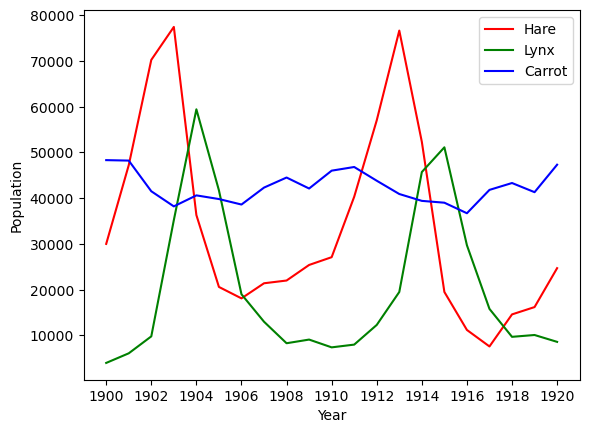

In [236]:
import matplotlib.pyplot as plt
import numpy as np
array = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt') 
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
year, hare, lynx, carrot = array[:,0], array[:, 1], array[:, 2], array[:, 3]
plt.plot(year, hare, label='Hare', c='r')
plt.plot(year, lynx, label='Lynx', c='g')
plt.plot(year, carrot, label='Carrot', c='b')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(year[::2])
plt.legend()
plt.show()

# №2

[1902. 1903. 1904. 1912. 1913. 1914. 1915.]


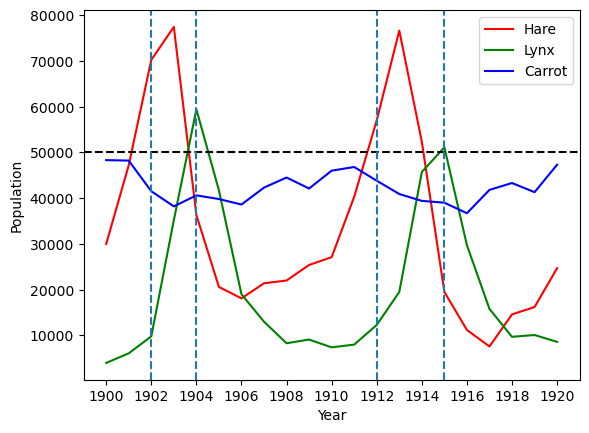

In [244]:
print(array[np.max(data, axis=1)>50000][:, 0])
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
year, hare, lynx, carrot = array[:,0], array[:, 1], array[:, 2], array[:, 3]
plt.plot(year, hare, label='Hare', c='r')
plt.plot(year, lynx, label='Lynx', c='g')
plt.plot(year, carrot, label='Carrot', c='b')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(year[::2])
plt.axhline(y=50000, color='black', linestyle='--')
plt.axvline(x=1902, linestyle='--')
plt.axvline(x=1904, linestyle='--')
plt.axvline(x=1912, linestyle='--')
plt.axvline(x=1915, linestyle='--')
plt.legend()
plt.show()

# №3

[1903. 1904. 1900.]


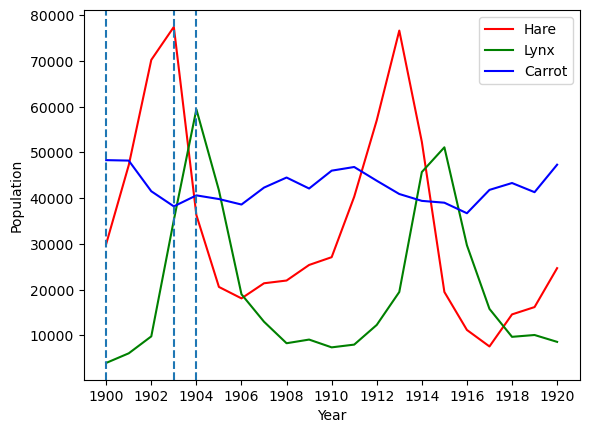

In [245]:
print(array[array.argmax(axis=0)][1:][:, 0])
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
year, hare, lynx, carrot = array[:,0], array[:, 1], array[:, 2], array[:, 3]
plt.plot(year, hare, label='Hare', c='r')
plt.plot(year, lynx, label='Lynx', c='g')
plt.plot(year, carrot, label='Carrot', c='b')
plt.axvline(x=1903, linestyle='--')
plt.axvline(x=1904, linestyle='--')
plt.axvline(x=1900, linestyle='--')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(year[::2])
plt.legend()
plt.show()

# №4

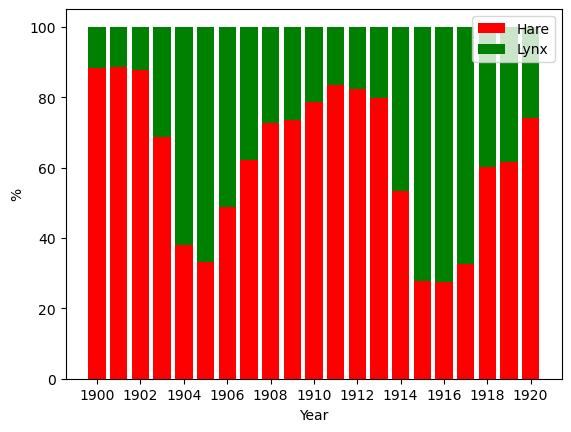

In [246]:
fig, graf = plt.subplots() 
vh = hare/(hare+lynx)*100
vl = lynx/(hare+lynx)*100
graf.bar(year, vh, label='Hare', color='r')
graf.bar(year, vl, bottom=vh, label='Lynx', color='g')
graf.set_ylabel('%')
graf.set_xlabel('Year')
graf.legend()
plt.xticks(year[::2])
plt.show()

# №5

Hare mean: 34080.95238095238
Hare std: 20897.906458089667
Lynx mean: 20166.666666666668
Lynx std: 16254.591536908763
Carrot mean: 42400.0
Carrot std: 3322.5062255844787


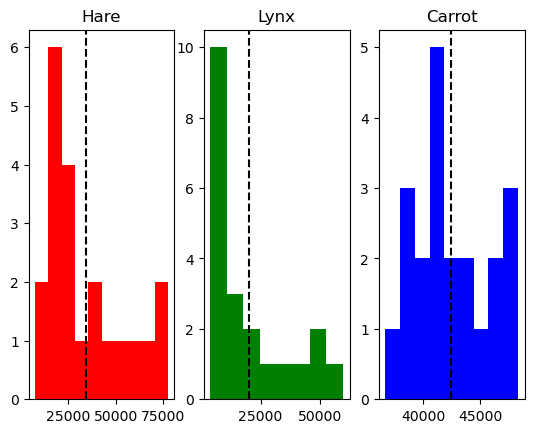

In [247]:
print("Hare mean:", np.mean(hare))
print("Hare std:", np.std(hare))
print("Lynx mean:", np.mean(lynx))
print("Lynx std:", np.std(lynx))
print("Carrot mean:", np.mean(carrot))
print("Carrot std:", np.std(carrot))
fig, (graf1, graf2, graf3) = plt.subplots(1, 3)
graf1.hist(hare, bins=10, color="r")
graf1.set_title('Hare')
graf1.axvline(x=np.mean(hare), color='black', linestyle='--')
graf2.hist(lynx, bins=8, color="g")
graf2.set_title('Lynx')
graf2.axvline(x=np.mean(lynx), color='black', linestyle='--')
graf3.hist(carrot, bins=9, color="b")
graf3.set_title('Carrot')
graf3.axvline(x=np.mean(carrot), color='black', linestyle='--')
plt.show()

# №6

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


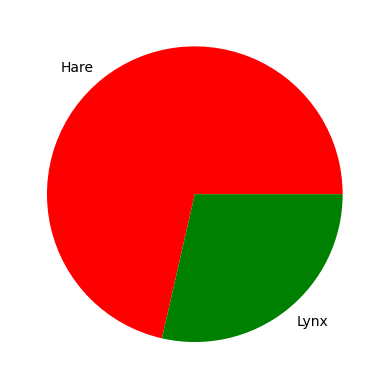

In [248]:
def H_L(i):
    s="L"
    if hare[i]>lynx[i]:
        s="H"
    return s
mas=np.vectorize(H_L)(range(len(array[:, 1])))
print(mas)
plt.pie([np.count_nonzero(mas=="H"), np.count_nonzero(list=="L")], labels=['Hare', 'Lynx'], colors=["r", "g"]) 
plt.show()

# №7

0.8045789988640188


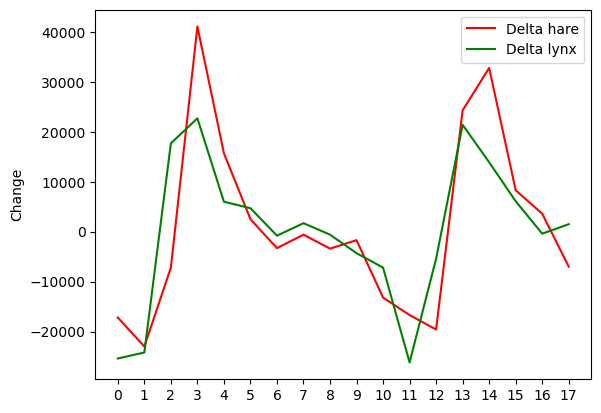

In [278]:
#По графику популяций заметим,что один сдвинут относительно другого на 1-2 года. Таким образом найдем корреляцию изменений численности с учетом сдвига на 1 год
def delta_h(i):
    return hare[i]-hare[i+1]
d_hare = np.vectorize(delta_h)(range(len(hare)-1)[:-2])
def delta_l(i):
    return lynx[i]-lynx[i+1]
d_lynx = np.vectorize(delta_l)(range(len(lynx)-1)[2:])
print(np.corrcoef(d_hare,d_lynx)[0,1])
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.plot(range(len(lynx)-3), d_hare, label='Delta hare', c='r')
plt.plot(range(len(lynx)-3), d_lynx, label='Delta lynx', c='g')
plt.ylabel('Change')
plt.xticks(range(len(lynx)-3))
plt.legend()
plt.show()

# №8

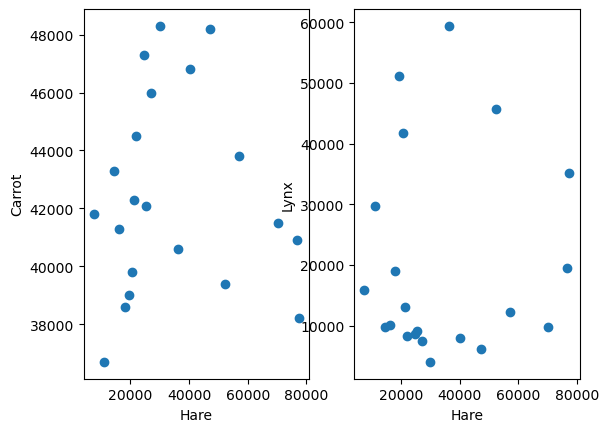

In [186]:
fig, (graf1, graf2) = plt.subplots(1, 2)
graf1.scatter(hare, carrot)
graf1.set(xlabel='Hare', ylabel='Carrot')
graf2.scatter(hare, lynx)
graf2.set(xlabel='Hare', ylabel='Lynx')
plt.show()

# №9

In [284]:
#Блаблабла
def otn(i):
    return abs(d_hare[i]-d_lynx[i])
d = np.mean(np.vectorize(otn)(range(len(d_hare))))
print("Реальное значение=",hare[20])
print("Вероятное значение=",hare[18]+d+d_lynx[17])
print("Погрешность=",abs(hare[18]+d+d_lynx[17]-hare[20])/hare[20]*100,"%")

Реальное значение= 24700.0
Вероятное значение= 23933.333333333332
Погрешность= 3.1039136302294246 %
